# ALE plots

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook we will calculate Accumulated Local Effects (ALE) manually to understand how these plots are created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Load data

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50)

## Random Forest

In [4]:
# train model

rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=3,
    random_state=3,
).fit(X_train, y_train)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.5662519439438518

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.5455953740118167

The model explains > 50% of the variability in the target.

## ALE plot

In [7]:
# sort variable of interest into bins
# I'll do just 5 bins; it is easier to vsualize

feat_cut, bins = pd.cut(
    X_test["MedInc"], 
    bins = 5,
    include_lowest=True, 
    retbins=True,
)


# the intervals into which
# each observation was sorted:

feat_cut

1945       (3.4, 6.3]
18006      (3.4, 6.3]
13062      (3.4, 6.3]
13396      (3.4, 6.3]
9787     (0.484, 3.4]
             ...     
2931     (0.484, 3.4]
2060     (0.484, 3.4]
5224     (0.484, 3.4]
15474    (0.484, 3.4]
13745      (3.4, 6.3]
Name: MedInc, Length: 6192, dtype: category
Categories (5, interval[float64, right]): [(0.484, 3.4] < (3.4, 6.3] < (6.3, 9.2] < (9.2, 12.1] < (12.1, 15.0]]

In [8]:
# bin edges (the limits of each interval)

bins

array([ 0.4853998,  3.39994  ,  6.29998  ,  9.20002  , 12.10006  ,
       15.0001   ])

In [9]:
# wheter the value is in the first bin, second bin, 
# third bin and so on:

bin_number = feat_cut.cat.codes

bin_number

1945     1
18006    1
13062    1
13396    1
9787     0
        ..
2931     0
2060     0
5224     0
15474    0
13745    1
Length: 6192, dtype: int8

In [10]:
# this list captures the lowest value of the 
# interval to which each observation was allocated:

[bins[i] for i in bin_number]

[3.39994,
 3.39994,
 3.39994,
 3.39994,
 0.4853998,
 0.4853998,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 9.200019999999999,
 0.4853998,
 0.4853998,
 3.39994,
 0.4853998,
 6.29998,
 0.4853998,
 3.39994,
 6.29998,
 3.39994,
 0.4853998,
 3.39994,
 3.39994,
 3.39994,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 3.39994,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 3.39994,
 6.29998,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 3.39994,
 0.4853998,
 6.29998,
 3.39994,
 0.4853998,
 0.4853998,
 0.4853998,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 0.4853998,
 6.29998,
 6.29998,
 3.39994,
 3.39994,
 3.39994,
 6.29998,
 3.39994,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 0.4853998,
 3.39994,
 3.39994,
 3.39994,
 3.39994,
 0.4853998,
 3.39994,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 0.4853998,
 3.39994,
 3.39994,
 0.4853998,
 3.39994,
 0.4853998,
 3.39994,
 0.4853998,
 3.39994,
 3.39994,
 3.39994,
 0.4853998,
 3.399

In [11]:
# to be sure, let's put the values together:

tmp = pd.concat([
    X_test["MedInc"],
    feat_cut,
    pd.Series([bins[i] for i in bin_number], index=X_test.index)
], axis=1)

tmp.columns = ["MedInc", "MedInc_binned", "Lower interval value"]

tmp

,MedInc,MedInc_binned,Lower interval value
1945,5.5111,"(3.4, 6.3]",3.39994
18006,4.8542,"(3.4, 6.3]",3.39994
13062,5.3100,"(3.4, 6.3]",3.39994
13396,4.6727,"(3.4, 6.3]",3.39994
9787,2.4881,"(0.484, 3.4]",0.48540
...,...,...,...
2931,1.4015,"(0.484, 3.4]",0.48540
2060,2.9013,"(0.484, 3.4]",0.48540
5224,1.1384,"(0.484, 3.4]",0.48540
15474,2.8586,"(0.484, 3.4]",0.48540


In [12]:
# now let's fetch the higher value of the
# interval:

tmp = pd.concat([
    X_test["MedInc"],
    feat_cut,
    pd.Series([bins[i+1] for i in bin_number], index=X_test.index)
], axis=1)

tmp.columns = ["MedInc", "MedInc_binned", "upper interval value"]

tmp

,MedInc,MedInc_binned,upper interval value
1945,5.5111,"(3.4, 6.3]",6.29998
18006,4.8542,"(3.4, 6.3]",6.29998
13062,5.3100,"(3.4, 6.3]",6.29998
13396,4.6727,"(3.4, 6.3]",6.29998
9787,2.4881,"(0.484, 3.4]",3.39994
...,...,...,...
2931,1.4015,"(0.484, 3.4]",3.39994
2060,2.9013,"(0.484, 3.4]",3.39994
5224,1.1384,"(0.484, 3.4]",3.39994
15474,2.8586,"(0.484, 3.4]",3.39994


In [13]:
# Now, let's do it in the dataframe, so that we can
# use the modified dataframe to make predictions

# make a copy
X1 = X_test.copy()
X2 = X_test.copy()

# replace with the lowest value in one df
# and the highest value in the next:

X1["MedInc"] = [bins[i] for i in bin_number]
X2["MedInc"] = [bins[i + 1] for i in bin_number]

In [14]:
# Note that, as opposed to PDP plots, here we replace 
# values with their respective interval lower and upper
# values.

# We do not set the entire dataset to a single value
# like in PDP.

X1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
1945,3.39994,9.0,6.536657,1.041056,788.0,2.310850
18006,3.39994,31.0,4.868805,1.071429,1891.0,2.756560
13062,3.39994,15.0,7.168085,1.061702,1733.0,3.687234
13396,3.39994,5.0,5.395331,1.020233,3845.0,2.992218
9787,0.48540,29.0,6.101911,1.229299,1019.0,3.245223


In [15]:
X2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
1945,6.29998,9.0,6.536657,1.041056,788.0,2.310850
18006,6.29998,31.0,4.868805,1.071429,1891.0,2.756560
13062,6.29998,15.0,7.168085,1.061702,1733.0,3.687234
13396,6.29998,5.0,5.395331,1.020233,3845.0,2.992218
9787,3.39994,29.0,6.101911,1.229299,1019.0,3.245223


In [16]:
# Now we obtain the predictions for the lower
# and higher value replacements:

y_1 = rf.predict(X1).ravel()
y_2 = rf.predict(X2).ravel()

In [17]:
local_effect = pd.DataFrame({
    "bin": bins[bin_number + 1],
    "local_effect": y_2 - y_1,
})

local_effect

,bin,local_effect
0,6.29998,1.054050
1,6.29998,0.811283
2,6.29998,0.783987
3,6.29998,0.783987
4,3.39994,0.679925
...,...,...
6187,3.39994,0.541866
6188,3.39994,0.679925
6189,3.39994,0.469778
6190,3.39994,1.286636


In [18]:
# the mean difference in the prediction per interval:
# plus the number of observations per interval

mean_local_effect = local_effect.groupby(
    ["bin"])["local_effect"].agg([("mean_local_effect", "mean"), "size"])

mean_local_effect

,mean_local_effect,size
bin,,
3.39994,0.773045,2926
6.29998,0.960853,2700
9.20002,1.711303,465
12.10006,0.000000,73
15.00010,0.000000,28


In [19]:
# the accumulated local effect:

mean_local_effect["ale"] = mean_local_effect["mean_local_effect"].cumsum()

mean_local_effect

,mean_local_effect,size,ale
bin,,,
3.39994,0.773045,2926,0.773045
6.29998,0.960853,2700,1.733898
9.20002,1.711303,465,3.445201
12.10006,0.000000,73,3.445201
15.00010,0.000000,28,3.445201


In [20]:
# let's add the first value of the intervals:

mean_local_effect.loc[min(bins), :] = 0

mean_local_effect

,mean_local_effect,size,ale
bin,,,
3.39994,0.773045,2926.0,0.773045
6.29998,0.960853,2700.0,1.733898
9.20002,1.711303,465.0,3.445201
12.10006,0.000000,73.0,3.445201
15.00010,0.000000,28.0,3.445201
0.48540,0.000000,0.0,0.000000


In [21]:
# mean moving average (to centre the plot):

mean_mv_avg = (
    # the difference between 2 contiguous intervals, normalized
    (mean_local_effect["mean_local_effect"] + 
     mean_local_effect["mean_local_effect"].shift(1, fill_value=0)) /
    2 * mean_local_effect["size"]
).sum() / mean_local_effect["size"].sum()

mean_mv_avg

0.6711023357945096

In [22]:
# now we center the plot:

mean_local_effect = mean_local_effect.sort_index().assign(
    ale_centered=mean_local_effect["ale"] - mean_mv_avg)

mean_local_effect.reset_index(inplace=True)

mean_local_effect

,bin,mean_local_effect,size,ale,ale_centered
0,0.48540,0.000000,0.0,0.000000,-0.671102
1,3.39994,0.773045,2926.0,0.773045,0.101943
2,6.29998,0.960853,2700.0,1.733898,1.062795
3,9.20002,1.711303,465.0,3.445201,2.774098
4,12.10006,0.000000,73.0,3.445201,2.774098
5,15.00010,0.000000,28.0,3.445201,2.774098


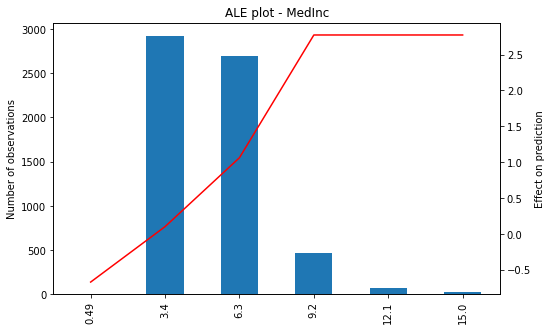

In [23]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax2 = ax.twinx()

mean_local_effect["size"].plot.bar(ax=ax)
mean_local_effect["ale_centered"].plot(ax=ax2, color="r")

plt.title(f"ALE plot - MedInc")
ax.set_ylabel("Number of observations")
ax2.set_ylabel("Effect on prediction")
plt.xticks(mean_local_effect.index, np.round(mean_local_effect["bin"], 2))
plt.show()

In [24]:
def plot_ale(model, X, feature, bins):
    
    feat_cut, bins = pd.cut(
        X[feature], 
        bins = bins,
        include_lowest=True, 
        retbins=True,
    )
    
    bin_number = feat_cut.cat.codes
    
    # make a copy
    X1 = X.copy()
    X2 = X.copy()

    # replace with the lowest value in one df
    # and the highest value in the next:

    X1[feature] = [bins[i] for i in bin_number]
    X2[feature] = [bins[i + 1] for i in bin_number]
    
    # obtain predictions
    y_1 = model.predict(X1).ravel()
    y_2 = model.predict(X2).ravel()
    
    delta_df = pd.DataFrame({
        "bin": bins[bin_number + 1],
        "delta": y_2 - y_1,
    })
    
    res_df = delta_df.groupby(["bin"])["delta"].agg([("effect", "mean"), "size"])

    res_df["ale"] = res_df["effect"].cumsum()

    res_df.loc[min(bins), :] = 0
    
    mean_mv_avg = (
        (res_df["effect"] + res_df["effect"].shift(1, fill_value=0)) / \
        2 * res_df["size"]
    ).sum() / res_df["size"].sum()
    
    res_df = res_df.sort_index().assign(ale_centered=res_df["ale"] - mean_mv_avg)

    res_df.reset_index(inplace=True)
    
    # plot
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)
    ax2 = ax.twinx()

    res_df["size"].plot.bar(ax=ax)
    res_df["ale_centered"].plot(ax=ax2, color="r")

    plt.title(f"ALE plot - {feature}")
    ax.set_ylabel("Number of observations")
    ax2.set_ylabel("Effect on prediction")
    plt.xticks(res_df.index, np.round(res_df["bin"],2))
    plt.show()

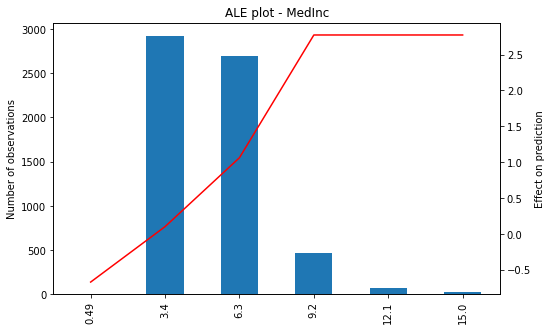

In [25]:
plot_ale(rf, X_test, "MedInc", 5)

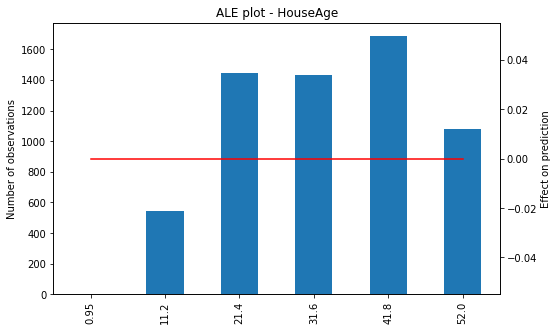

In [26]:
plot_ale(rf, X_test, "HouseAge", 5)

House age was not important to predict house price.

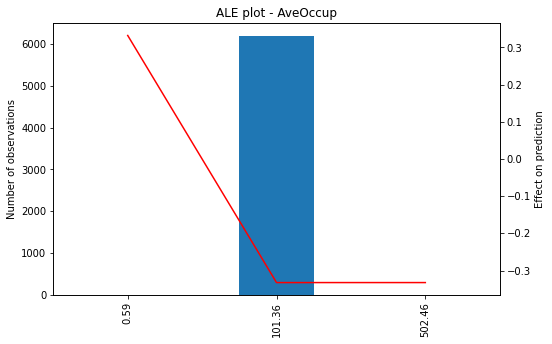

In [27]:
plot_ale(rf, X_test, "AveOccup", 5)

For this variable, the choice of interval number and how to find its limits was not optimal. We will come back to this later.